In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE=32
IMAGE_SIZE=224
CHANNELS=3
EPOCHS=35

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "train_set",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 9730 files belonging to 15 classes.


In [4]:
class_names=dataset.class_names
class_names

['Actinic keratosis',
 'BA- cellulitis',
 'BA-impetigo',
 'Basal cell carcinoma',
 'Benign keratosis',
 'Dermatofibroma',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'Melanoma',
 'PA-cutaneous-larva-migrans',
 'Squamous cell carcinoma',
 'VI-chickenpox',
 'VI-shingles',
 'Vascular lesion']

(32, 224, 224, 3)
[ 4  4  0 11  4  9  0  3  1  4 11  9  9  4 11  0  4  9  4  4  4 14  3  9
  4  3  3  0  9  0  3  9]


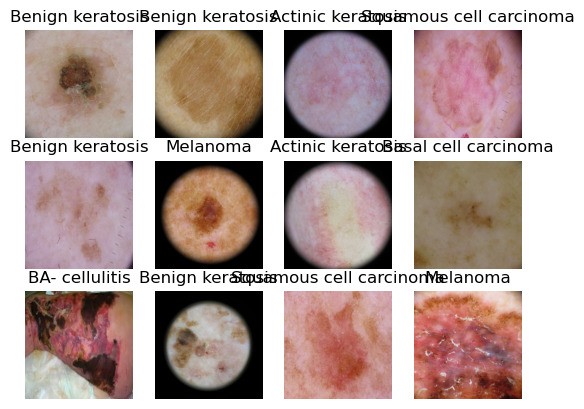

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [7]:
80% ==> Training
20% ==> test
    10% ==> Validation
    10% ==> Test

SyntaxError: invalid syntax (2738234259.py, line 1)

In [6]:
train_size=0.8
len(dataset)*train_size

244.0

In [7]:
train_ds=dataset.take(224)
len(train_ds)

224

In [8]:
test_ds=dataset.skip(224)
len(test_ds)

81

In [9]:
val_size=0.1
len(dataset)*val_size

30.5

In [10]:
val_ds=test_ds.take(30)
len(val_ds)

30

In [11]:
test_ds=test_ds.take(30)
len(test_ds)

30

In [12]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split) == 1
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
    

In [13]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [14]:
len(train_ds)

244

In [15]:
len(val_ds)

30

In [16]:
len(test_ds)

31

In [17]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [18]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [19]:
data_augmentation

<Sequential name=sequential_1, built=False>

In [20]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # No need to include BATCH_SIZE here
n_classes = 15

model = models.Sequential([
   layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS), batch_size=BATCH_SIZE),  # Explicitly define the input shape
    resize_and_rescale,               # Assuming resize_and_rescale is defined somewhere else in your code
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 10, 10, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 5, 5, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 3, 3, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 1, 1, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 15)                    │             975 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 172,239 (672.81 KB)

 Trainable params: 172,239 (672.81 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/35
244/244 ━━━━━━━━━━━━━━━━━━━━ 204s 726ms/step - accuracy: 0.2722 - loss: 2.1393 - val_accuracy: 0.3260 - val_loss: 1.9863
Epoch 2/35
244/244 ━━━━━━━━━━━━━━━━━━━━ 197s 695ms/step - accuracy: 0.3215 - loss: 1.9884 - val_accuracy: 0.3615 - val_loss: 1.8702
Epoch 3/35
244/244 ━━━━━━━━━━━━━━━━━━━━ 198s 708ms/step - accuracy: 0.3616 - loss: 1.8487 - val_accuracy: 0.3542 - val_loss: 1.7500
Epoch 4/35
244/244 ━━━━━━━━━━━━━━━━━━━━ 197s 695ms/step - accuracy: 0.3859 - loss: 1.7303 - val_accuracy: 0.4385 - val_loss: 1.6216
Epoch 5/35
244/244 ━━━━━━━━━━━━━━━━━━━━ 193s 692ms/step - accuracy: 0.4179 - loss: 1.6202 - val_accuracy: 0.4396 - val_loss: 1.5033
Epoch 6/35
244/244 ━━━━━━━━━━━━━━━━━━━━ 195s 709ms/step - accuracy: 0.4194 - loss: 1.5605 - val_accuracy: 0.4135 - val_loss: 1.5196
Epoch 7/35
244/244 ━━━━━━━━━━━━━━━━━━━━ 197s 695ms/step - accuracy: 0.4365 - loss: 1.5041 - val_accuracy: 0.4753 - val_loss: 1.4336
Epoch 8/35
244/244 ━━━━━━━━━━━━━━━━━━━━ 193s 691ms/step - accuracy: 0.4534 -

In [25]:
scores=model.evaluate(test_ds)

31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 453ms/step - accuracy: 0.7899 - loss: 0.5823


In [26]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 244}

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

First image to predict
Actual Label: Vascular lesion
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Label: Basal cell carcinoma


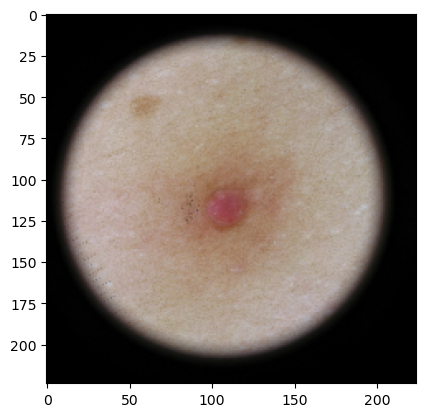

In [29]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])
    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [30]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(1000*(np.max(predictions[0])),2)
    return predicted_class, confidence
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


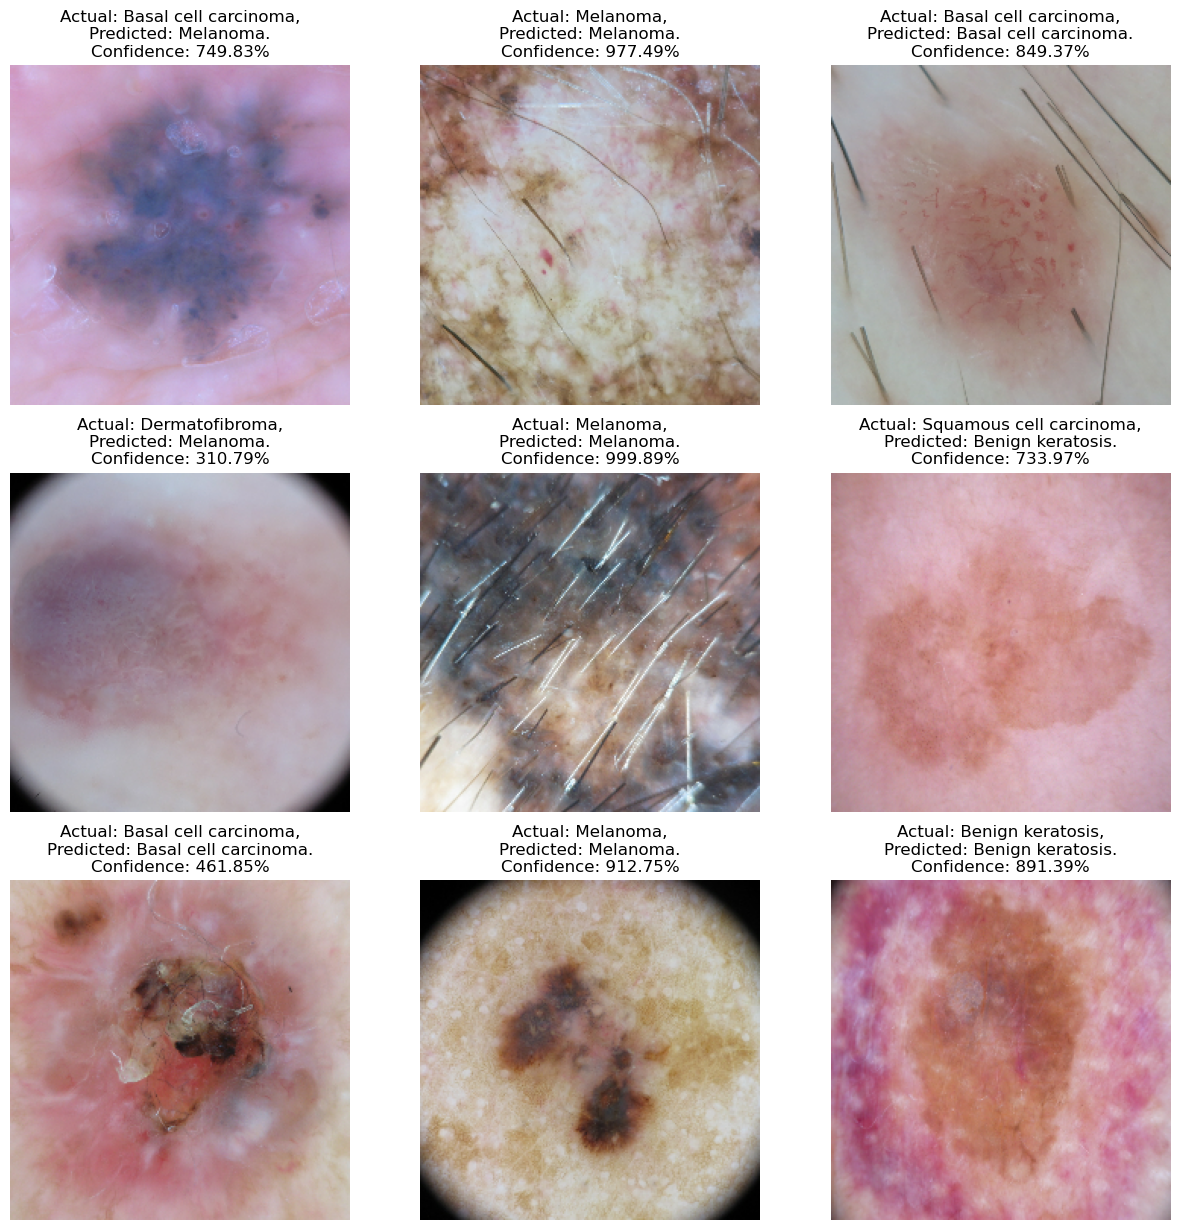

In [31]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Fix method chaining and remove misplaced comma
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence:.2f}%")  # Fixed syntax
        plt.axis("off")

In [32]:
import os
import tensorflow as tf

# Define the base directory
base_dir = 'models/'

# Create the base directory if it does not exist
os.makedirs(base_dir, exist_ok=True)

# List existing directories and determine the next model version
try:
    existing_versions = [int(name) for name in os.listdir(base_dir) if name.isdigit()]
except FileNotFoundError:
    existing_versions = []

model_version = max(existing_versions, default=0) + 1

# Define the directory where you want to save the model
save_path = f"{base_dir}{model_version}/"

# Save the model to the defined path in SavedModel format (which includes .pb)
tf.saved_model.save(model, save_path)

print(f"Model saved at: {save_path}")


INFO:tensorflow:Assets written to: models/2/assets


INFO:tensorflow:Assets written to: models/2/assets


Model saved at: models/2/
